<a href="https://colab.research.google.com/github/cinaral/saymyname/blob/master/week10_approximation/06072020_week10_Approximation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approximation of Higher Order Systems

In this part, we will try to approximate motor system, which is higher order system, into second order system.

By approximation, we mean reducing the order of the transfer function of the system. In order to do this, we look the dominant poles which are close to imaginary axis in s domain. Most of the times, higher order systems can be represented as first or second order tranfer functions. Moreover, we can understand the system easily by looking its physically equivalent system because the original system will behave similar as reduced system.

Let us remember the form of first and second order systems;

First order systems;

\begin{equation*}
\frac{Output}{Input}=\frac{Y(s)}{X(s)}=\frac{G(s)}{1+G(s)H(s)}=\frac{a}{bs+c}
\end{equation*}

where a, b, c are some constans.

Second order systems;

\begin{equation*}
\frac{Output}{Input}=\frac{Y(s)}{X(s)}=\frac{G(s)}{1+G(s)H(s)}=\frac{as+b}{cs^2+ds+e}=\frac{Kw_n^2}{s^2+2{\zeta}w_ns+w_n^2}
\end{equation*}

where K is any constant or specifically DC gain.

Higher order systems have transfer function as;

\begin{equation*}
\frac{Output}{Input}=\frac{Y(s)}{X(s)}=\frac{G(s)}{1+G(s)H(s)}=\frac{b_ms^m+b_{m-1}s^{m-1}+\dots+b_1s+b_0}{a_ns^n+a_{n-1}s^{n-1}+\dots+a_1s+a_0}\\
\end{equation*}

\begin{equation*}
where \space m\leq n\\
\end{equation*}

The factorized form is;

\begin{equation*}
\frac{Y(s)}{X(s)}=\frac{(s+z_1)(s+z_2)\dots(s+z_m)}{(s+p_1)(s+p_2)\dots(s+p_n)}\\
\end{equation*}

\begin{equation*}
where \space z_m \space is \space zero \space and \space p_n \space is \space pole \space of \space the \space system.
\end{equation*}

Let us have simple DC motor with load.

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/basit-dc-motor-dc-motor-5875-34-B.jpg)

and here is the diagram of it;

![alt text](https://raw.githubusercontent.com/cinaral/saymyname/master/references/Armature-circuit-7.png)

The transfer function of this system is;

\begin{equation*}
\frac{Output}{Input}=\frac{\theta(s)}{V(s)}=\frac{k_{torque}}{JLs^3+(JR+Lb)s^2+(Rb+k_{torque}k_{backemf})s}
\end{equation*}

\begin{equation*}
where \space k_{torque} \space is \space motor-torque \space constant \space and \space k_{backemf} \space is \space back-emf \space constant.
\end{equation*}

It is third order system.

Let' s look the step responce of the system because motor works with DC voltage which is constant in time;

# Install and import necessary libraries;

In [1]:
!pip install control

import matplotlib
import ipywidgets
import plotly
import os
from IPython import *

%matplotlib inline
from sympy import symbols
from sympy import simplify
from sympy.abc import s, t, a
from sympy.integrals import *
from sympy.plotting import *
from control import *
from control.matlab import *
import matplotlib.pyplot as plt
from sympy import Heaviside

import numpy as np 
from scipy.integrate import odeint
import scipy.integrate as integrate
import matplotlib.pyplot as plt 
import math
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML

     |████████████████████████████████| 256kB 3.3MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=ac960c75f40560803ebb04b82dcde13520a5f07f68e095e1ace039c1a84e1435
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


# Now define the transfer function;

We can choose arbitrary constants.

In [264]:
J = 1
L = 1
R = 5
b = 0.5
ktorque = 3
kbackemf = 2

num = [ktorque]
denum = [J*L, (J*R+L*b), (R*b+ktorque*kbackemf), 0]

tr = tf(num, denum)
print("Transfer Function is")
print(tr)

Transfer Function is

          3
---------------------
s^3 + 5.5 s^2 + 8.5 s



Step response


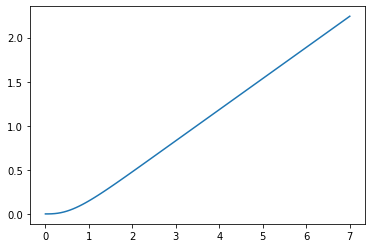

In [265]:
# Step response for the system
print('Step response')
plt.figure(1)
yout, T = step(tr)
plt.plot(T.T, yout.T)
plt.show(block=False)


There is no controller.

Let's look its poles positions.

(array([-2.75+0.96824584j, -2.75-0.96824584j,  0.  +0.j        ]),
 array([], dtype=float64))

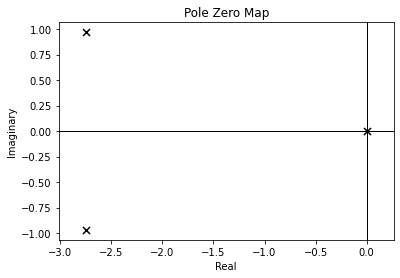

In [266]:
#Positions of poles and zeros
pzmap(tr,Plot=True,grid=False, title='Pole Zero Map')

It acts like first order system, but it has a pole on imaginary axis, at origin, so it is not bounded which means the angular speed increases until the motor fails. We need to use controller.

# DC motor with PID controller

Let us have PID controller and unity feedback. Then, the transfer function of the complite system becomes;

\begin{equation*}
\frac{Output}{Input}=\frac{\theta(s)}{V(s)}=\frac{K_dk_{torque}s^2+K_pk_{torque}s+K_ik_{torque}}{JLs^4+(JR+Lb)s^3+(Rb+k_{torque}k_{backemf}+K_dk_{torque})s^2+K_pk_{torque}s+K_ik_{torque}}
\end{equation*}

which is fourth order system.

Let us look step responce of this system. It should not have oscillation because oscillation means motor angular speed increases and decreases for a couple of times, and then it reaches stability. The desireable system should be like critically damped.

In [280]:
J = 1
L = 1
R = 5
b = 0.5
ktorque = 3
kbackemf = 2

Kp = 5
Kd = 0.5
Ki = 0.005

num = [Kd*ktorque, Kp*ktorque, Ki*ktorque]
denum = [J*L, (J*R+L*b), (R*b+ktorque*kbackemf+Kd*ktorque), Kp*ktorque, Ki*ktorque]

tr = tf(num, denum)
print("Transfer Function is")
print(tr)

Transfer Function is

        1.5 s^2 + 15 s + 0.015
-------------------------------------
s^4 + 5.5 s^3 + 10 s^2 + 15 s + 0.015



Step response


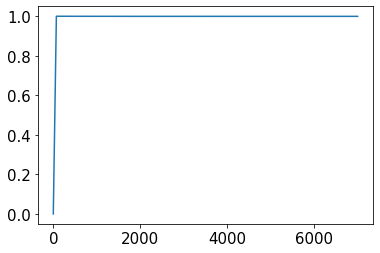

In [281]:
# Step response for the system
print('Step response')
plt.figure(1)
yout, T = step(tr)
plt.plot(T.T, yout.T)
plt.show(block=False)


The speed increases and reaches constant value with critically damping for Kp = 5, Kd = 0.5, Ki = 0.005 gain values.

Let' s look its pole position so that we can reduce its order.

(array([-3.92576943e+00+0.j        , -7.86614954e-01+1.78874156j,
        -7.86614954e-01-1.78874156j, -1.00066719e-03+0.j        ]),
 array([-9.99899990e+00, -1.00010002e-03]))

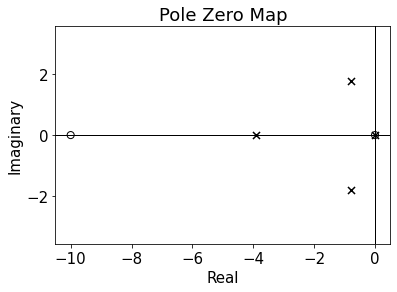

In [282]:
#Positions of poles and zeros
pzmap(tr,Plot=True,grid=False, title='Pole Zero Map')

Here, pole -1.0007+0j and zero -1.0001 are very close so they cancel eachother, and we can ignore zero -9.999 and pole -3.926.

Dominant poles are -7.87 - 1.79j and -7.87 + 1.79j

Then reduced equation for this system can be written as;

\begin{equation*}
\frac{\theta(s)}{V(s)}=TR_{reduced}=\frac{15}{s^2+15.74s+65.14}
\end{equation*}

which is second order system.

If we look step responce of this system, we should see similar plot like above.

In [283]:
num = [15]
denum = [1, 15.74, 65.14]

tr = tf(num, denum)
print("Transfer Function is")
print(tr)

Transfer Function is

          15
---------------------
s^2 + 15.74 s + 65.14



Step response


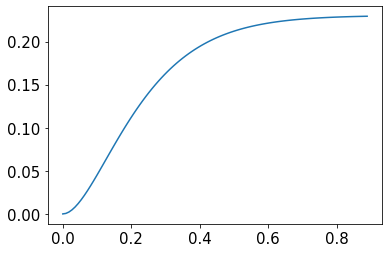

In [284]:
# Step response for the system
print('Step response')
plt.figure(1)
yout, T = step(tr)
plt.plot(T.T, yout.T)
plt.show(block=False)


As we can see that reduced system is also critically damped. The speed of motor increases and reaches a constant value. The main differance between two plots is their scale which is reasonable because of the order reduction.

Hence, by reducing order, we get basic idea about the behavior of the system.

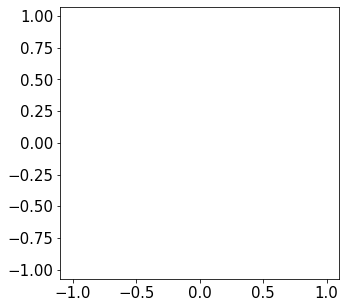

In [312]:
#defining the function for ODE
def mode1(theta,t):
	theta1 = theta[0]
	theta2 = theta[1]
	dtheta1_dt = theta2 
	dtheta2_dt = -(2.5/5)*theta2 + 3
	dtheta_dt = [dtheta1_dt, dtheta2_dt]
	return dtheta_dt


#initial condition
theta_0 = [0,1]

#time points
t = np.linspace(0,30,150)

#solving ODE by function call
theta = odeint(mode1,theta_0,t)

#animation
fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 15

lns = []
for i in range(len(theta)):

	#plotting the string/chord
    ln, = ax.plot([0, np.sin(theta[i, 0])], [0, -np.cos(theta[i, 0])], color='k', lw=2)

    #plotting the bob
    bob, = ax.plot(np.sin(theta[i, 0]), -np.cos(theta[i, 0]),'o',markersize=20,color='r')

    #plotting the time for simulation
    tm = ax.text(-0.9, 0.25, 'Time = %.1fs' % t[i])
    lns.append([ln, bob, tm])
    
ax.set_aspect('equal', 'datalim')
ani = animation.ArtistAnimation(fig, lns, interval=50)
rc('animation', html='jshtml')
ani

This is the animation of the system above for simple realization. Motor rotates the point. This can be a wheel of robot.